In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

1標本検定

1.959963984540054


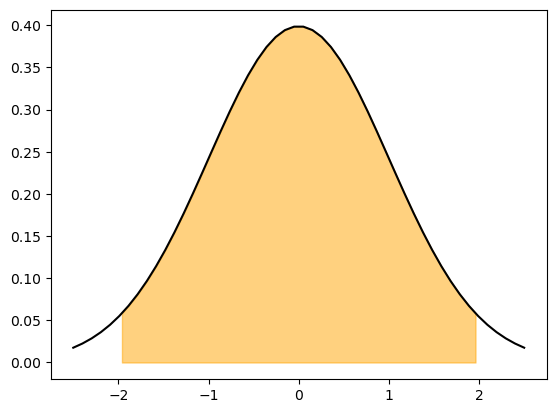

In [2]:
stnorm = stats.norm(loc=0.0, scale=1.0)

x_lin = np.linspace(-2.5, 2.5)
x95 = stnorm.ppf(0.975)
x_lin95 = np.linspace(-x95, x95)

print(x95)

plt.plot(x_lin, stnorm.pdf(x_lin), c="k")
plt.fill_between(x_lin95, 0, stnorm.pdf(x_lin95), color="orange", alpha=0.5)
plt.show()

1.6448536269514722


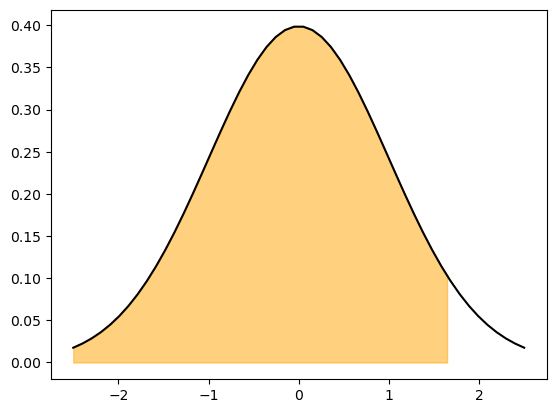

In [3]:
stnorm = stats.norm(loc=0.0, scale=1.0)

x_lin = np.linspace(-2.5, 2.5)
x95 = stnorm.ppf(0.95)
x_lin95 = np.linspace(-2.5, x95)

print(x95)

plt.plot(x_lin, stnorm.pdf(x_lin), c="k")
plt.fill_between(x_lin95, 0, stnorm.pdf(x_lin95), color="orange", alpha=0.5)
plt.show()

2.2621571627409915


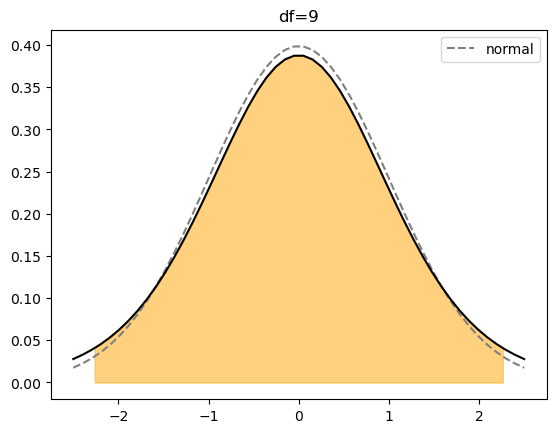

In [4]:
n = 10
t = stats.t(df=n - 1)

x_lin = np.linspace(-2.5, 2.5)
x95 = t.ppf(0.975)
x_lin95 = np.linspace(-x95, x95)

print(x95)

plt.plot(x_lin, stnorm.pdf(x_lin), c="gray", ls="--", label="normal")
plt.plot(x_lin, t.pdf(x_lin), c="k")
plt.fill_between(x_lin95, 0, t.pdf(x_lin95), color="orange", alpha=0.5)
plt.title(f"df={n-1}")
plt.legend()
plt.show()

1.8331129326536335


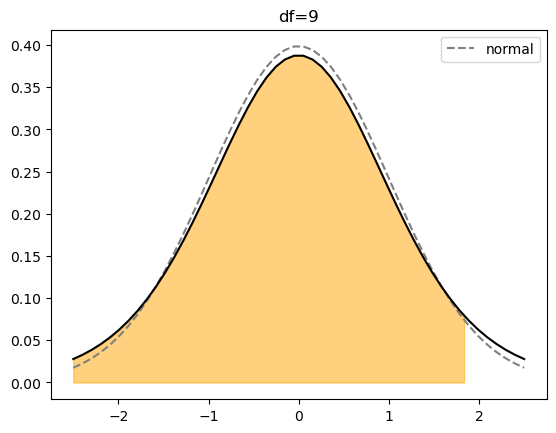

In [5]:
n = 10
t = stats.t(df=n - 1)

x_lin = np.linspace(-2.5, 2.5)
x95 = t.ppf(0.95)
x_lin95 = np.linspace(-2.5, x95)

print(x95)

plt.plot(x_lin, stnorm.pdf(x_lin), c="gray", ls="--", label="normal")
plt.plot(x_lin, t.pdf(x_lin), c="k")
plt.fill_between(x_lin95, 0, t.pdf(x_lin95), color="orange", alpha=0.5)
plt.title(f"df={n-1}")
plt.legend()
plt.show()

2.7003894999803584 19.02276779864163


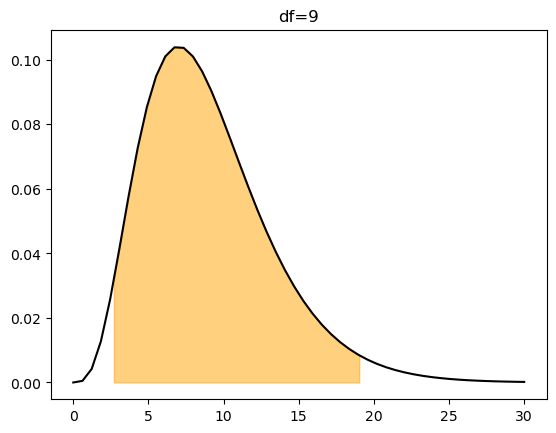

In [6]:
n = 10
chi2 = stats.chi2(df=n-1)

x_lin = np.linspace(1e-5, n*3)
x5 = chi2.ppf(0.025)
x95 = chi2.ppf(0.975)
x_lin95 = np.linspace(x5, x95)

print(x5, x95)

plt.title(f"df={n-1}")
plt.plot(x_lin, chi2.pdf(x_lin), c="k")
plt.fill_between(x_lin95, 0, chi2.pdf(x_lin95), color="orange", alpha=0.5)
plt.show()

16.918977604620448


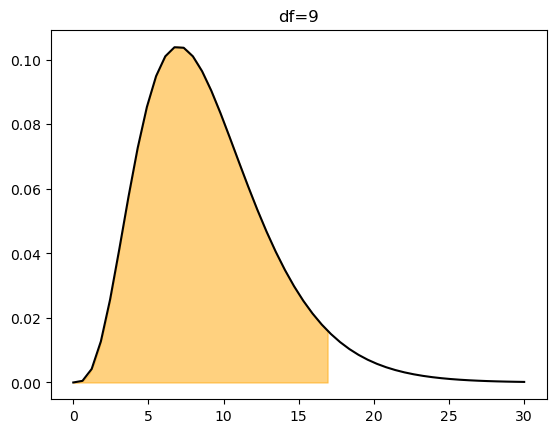

In [7]:
n = 10
chi2 = stats.chi2(df=n-1)

x_lin = np.linspace(1e-5, n*3)
x95 = chi2.ppf(0.95)
x_lin95 = np.linspace(1e-5, x95)

print(x95)

plt.title(f"df={n-1}")
plt.plot(x_lin, chi2.pdf(x_lin), c="k")
plt.fill_between(x_lin95, 0, chi2.pdf(x_lin95), color="orange", alpha=0.5)
plt.show()

# 例題１

In [8]:
n = 30
x = 10

n_experiment = 10000

# 繰り返し公平なサイコロを投げる
counter1 = 0
for i in range(n_experiment):
    counter2 = 0
    for j in range(n):
        dice = np.random.choice([1,2,3,4,5,6])
        if dice == 6:
            counter2 += 1

    if counter2 >= x:
        counter1 += 1


print(f"6が出た回数 = {counter1}回（{n_experiment}回中）({counter1/n_experiment*100}%)")

6が出た回数 = 193回（10000回中）(1.9300000000000002%)


In [9]:
# 帰無仮説
p0 = 1/6

# 二項分布
model = stats.binom(p=p0, n=n)
print(f"{x}回以上６が出る確率={100*(1-model.cdf(x-1))}%")


10回以上６が出る確率=1.970628376896777%


In [10]:
# 近似検定（比率の検定）
mu0 = p0
v0 = p0 * (1-p0)/n

z = (x/n - mu0)/np.sqrt(v0)

model = stats.norm(loc=0, scale=1)
print(f"{z=}")
print(f"p value = {2*(1-model.cdf(z))} (両側検定)") # zが負の時はmodel.cdf(z)を２倍する

z=2.449489742783178
p value = 0.014305878435429742 (両側検定)


# 例題２

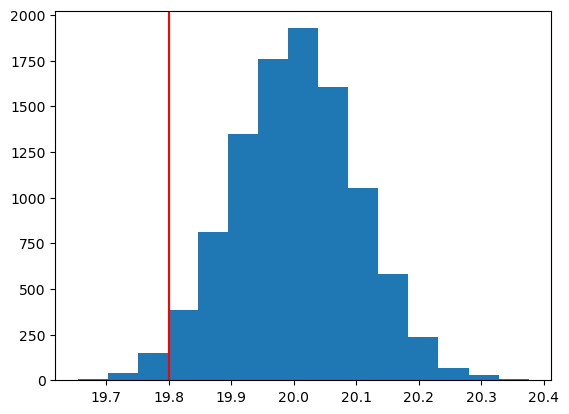

In [11]:
n = 100
mu0 =20.0
xbar = 19.8

s2 = 1.0

n_experiment = 10000

# 繰り返し公平な生産をする
# (真の分散も不偏分散と一致するとする)
x = np.empty(n_experiment)
for i in range(n_experiment):
    x[i] = np.random.normal(loc=mu0, scale=np.sqrt(s2), size=n).mean()

plt.hist(x, bins="sturges")
plt.axvline(xbar, color="red")
plt.show()

In [12]:
# t検定
t = (xbar - mu0) / np.sqrt(s2/n)

model_t = stats.t(df=n-1)
print(f"{t=}, 閾値{model_t.ppf(0.05/2)}")

t=-1.999999999999993, 閾値-1.9842169515086832


In [13]:
# z検定
z = (xbar - mu0) / np.sqrt(s2/n)

model_z = stats.norm()
print(f"{z=}, 閾値{model_z.ppf(0.05/2)}")

z=-1.999999999999993, 閾値-1.9599639845400545


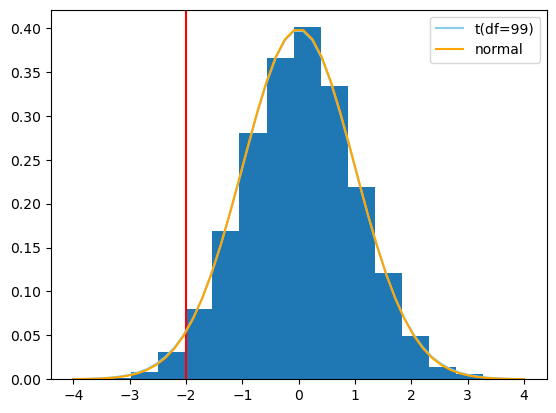

In [14]:
plt.hist((x-mu0)/np.sqrt(s2/n), bins="sturges", density=True)
plt.axvline((xbar-mu0)/np.sqrt(s2/n), color="red")
plt.plot(np.linspace(-4, 4), model_t.pdf(np.linspace(-4,4)), label=f"t(df={n-1})", color="skyblue")
plt.plot(np.linspace(-4, 4), model_z.pdf(np.linspace(-4,4)), label="normal", color="orange")
plt.legend()
plt.show()